# Predicting Loan Repayment for PeerLoanKart
PeerLoanKart is a Non-Banking Financial Company (NBFC) that facilitates peer-to-peer loans, connecting borrowers with investors. To enhance investor confidence and profitability, this project aims to develop a predictive model that determines the likelihood of a borrower repaying their loan. By focusing on creditworthy profiles, the model seeks to reduce Non-Performing Assets (NPA) and ensure loans are disbursed only to reliable borrowers, ultimately increasing profits and minimizing risk for the platform.

## Features
1. **credit.policy:** The lending institution's criteria or policy regarding the approval or denial of credit applications.
2. **purpose:** The reason or intended use for the loan (e.g., debt consolidation, home improvement, etc.).
3. **int.rate:** The interest rate for the loan, which can be a key factor in determining the applicant’s risk.
4. **installment:** The amount the borrower is required to pay on the loan in regular intervals.
5. **log.annual.inc:** The logarithm of the applicant’s annual income, likely to normalize the data and account for skewed income distributions.
6. **dti:** Debt-to-income ratio, which compares the applicant’s total monthly debt payments to their monthly income.
7. **fico:** The applicant’s FICO credit score, a key metric used in evaluating credit risk.
8. **days.with.cr.line:** The number of days the applicant has had credit lines open, indicating credit history length.
9. **revol.bal:** The revolving balance, representing the amount of credit card debt the applicant has.
10. **revol.util:** Revolving line utilization rate, which measures the percentage of available credit that is being used.
11. **inq.last.6mths:** The number of credit inquiries in the last six months, which can indicate how many times the applicant has recently applied for credit.
12. **delinq.2yrs:** The number of delinquencies (missed payments) the applicant has had in the last two years.
13. **pub.rec:** The number of public records (e.g., bankruptcies, tax liens, etc.) associated with the applicant.
14. **not.fully.paid:** Whether the applicant has fully paid back previous loans or not, potentially indicating default risk.

## Steps performed:

1. Importing libraries and knowing your data
2. Data Cleaning
3. Exploratory Data Analysis
4. One hot encoding
5. Splitting of data
6. Cross validation
7. Selection of Models: Decision Tree, Random Forest, and Gradient Boosting
8. Evaluation of Models

## Expected Outcome
Model will be able to reduce the False Positive Errors of such loan prediction problem completely using Gradient Boosting Model, which is a great advantage for the PeerLoanKart financial company and its customers as well.

In [5]:
# importing python libraries to perform operations

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("loan_borrower_data.csv")

In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [9]:
df.shape

(9578, 14)

In [10]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
#Basic information about features

In [13]:
#Number of approved-1 or denied-0 applications for loan
print("Approval or denial of credit application")
df["credit.policy"].value_counts()

Approval or denial of credit application


credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [14]:
#Different purpose of taking loan
for purpose in df["purpose"].unique():
    print(purpose)


debt_consolidation
credit_card
all_other
home_improvement
small_business
major_purchase
educational


In [15]:
#range of interest rate
min(df["int.rate"]), max(df["int.rate"])

(0.06, 0.2164)

In [16]:
#number of times an applicant's credit report checked in the past six months 

inq_table = df["inq.last.6mths"].value_counts().reset_index()
inq_table.columns = ["Number of times checked", "Number of People"]
print(inq_table)


    Number of times checked  Number of People
0                         0              3637
1                         1              2462
2                         2              1384
3                         3               864
4                         4               475
5                         5               278
6                         6               165
7                         7               100
8                         8                72
9                         9                47
10                       10                23
11                       11                15
12                       12                15
13                       15                 9
14                       13                 6
15                       14                 6
16                       18                 4
17                       16                 3
18                       19                 2
19                       24                 2
20                       17       

In [17]:
# Number of missed payments of the applications in last 2 years

delinq_table = df["delinq.2yrs"].value_counts().reset_index()
delinq_table.columns = ["Number of times missed", "Number of People"]
print(delinq_table)

    Number of times missed  Number of People
0                        0              8458
1                        1               832
2                        2               192
3                        3                65
4                        4                19
5                        5                 6
6                        6                 2
7                       13                 1
8                        7                 1
9                        8                 1
10                      11                 1


In [18]:

#Number of public record associated with applicant
pub_rec_table = df["pub.rec"].value_counts().reset_index()
pub_rec_table.columns = ["Number of public record", "Number of People"]
print(pub_rec_table)

   Number of public record  Number of People
0                        0              9019
1                        1               533
2                        2                19
3                        3                 5
4                        4                 1
5                        5                 1


In [19]:
#Number of applicants fully paid back loan amount
# 0- (Paid)
# 1- (Not fully paid)


#Number of public record associated with applicant
loan_paid = df["not.fully.paid"].value_counts().reset_index()
loan_paid.columns = ["Paid or Not", "Number of People"]
print(loan_paid)

   Paid or Not  Number of People
0            0              8045
1            1              1533


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


## Relationship between features

### Univariate Analysis

In [23]:
# Distribution of Numerical Features shown in histograms and boxplots

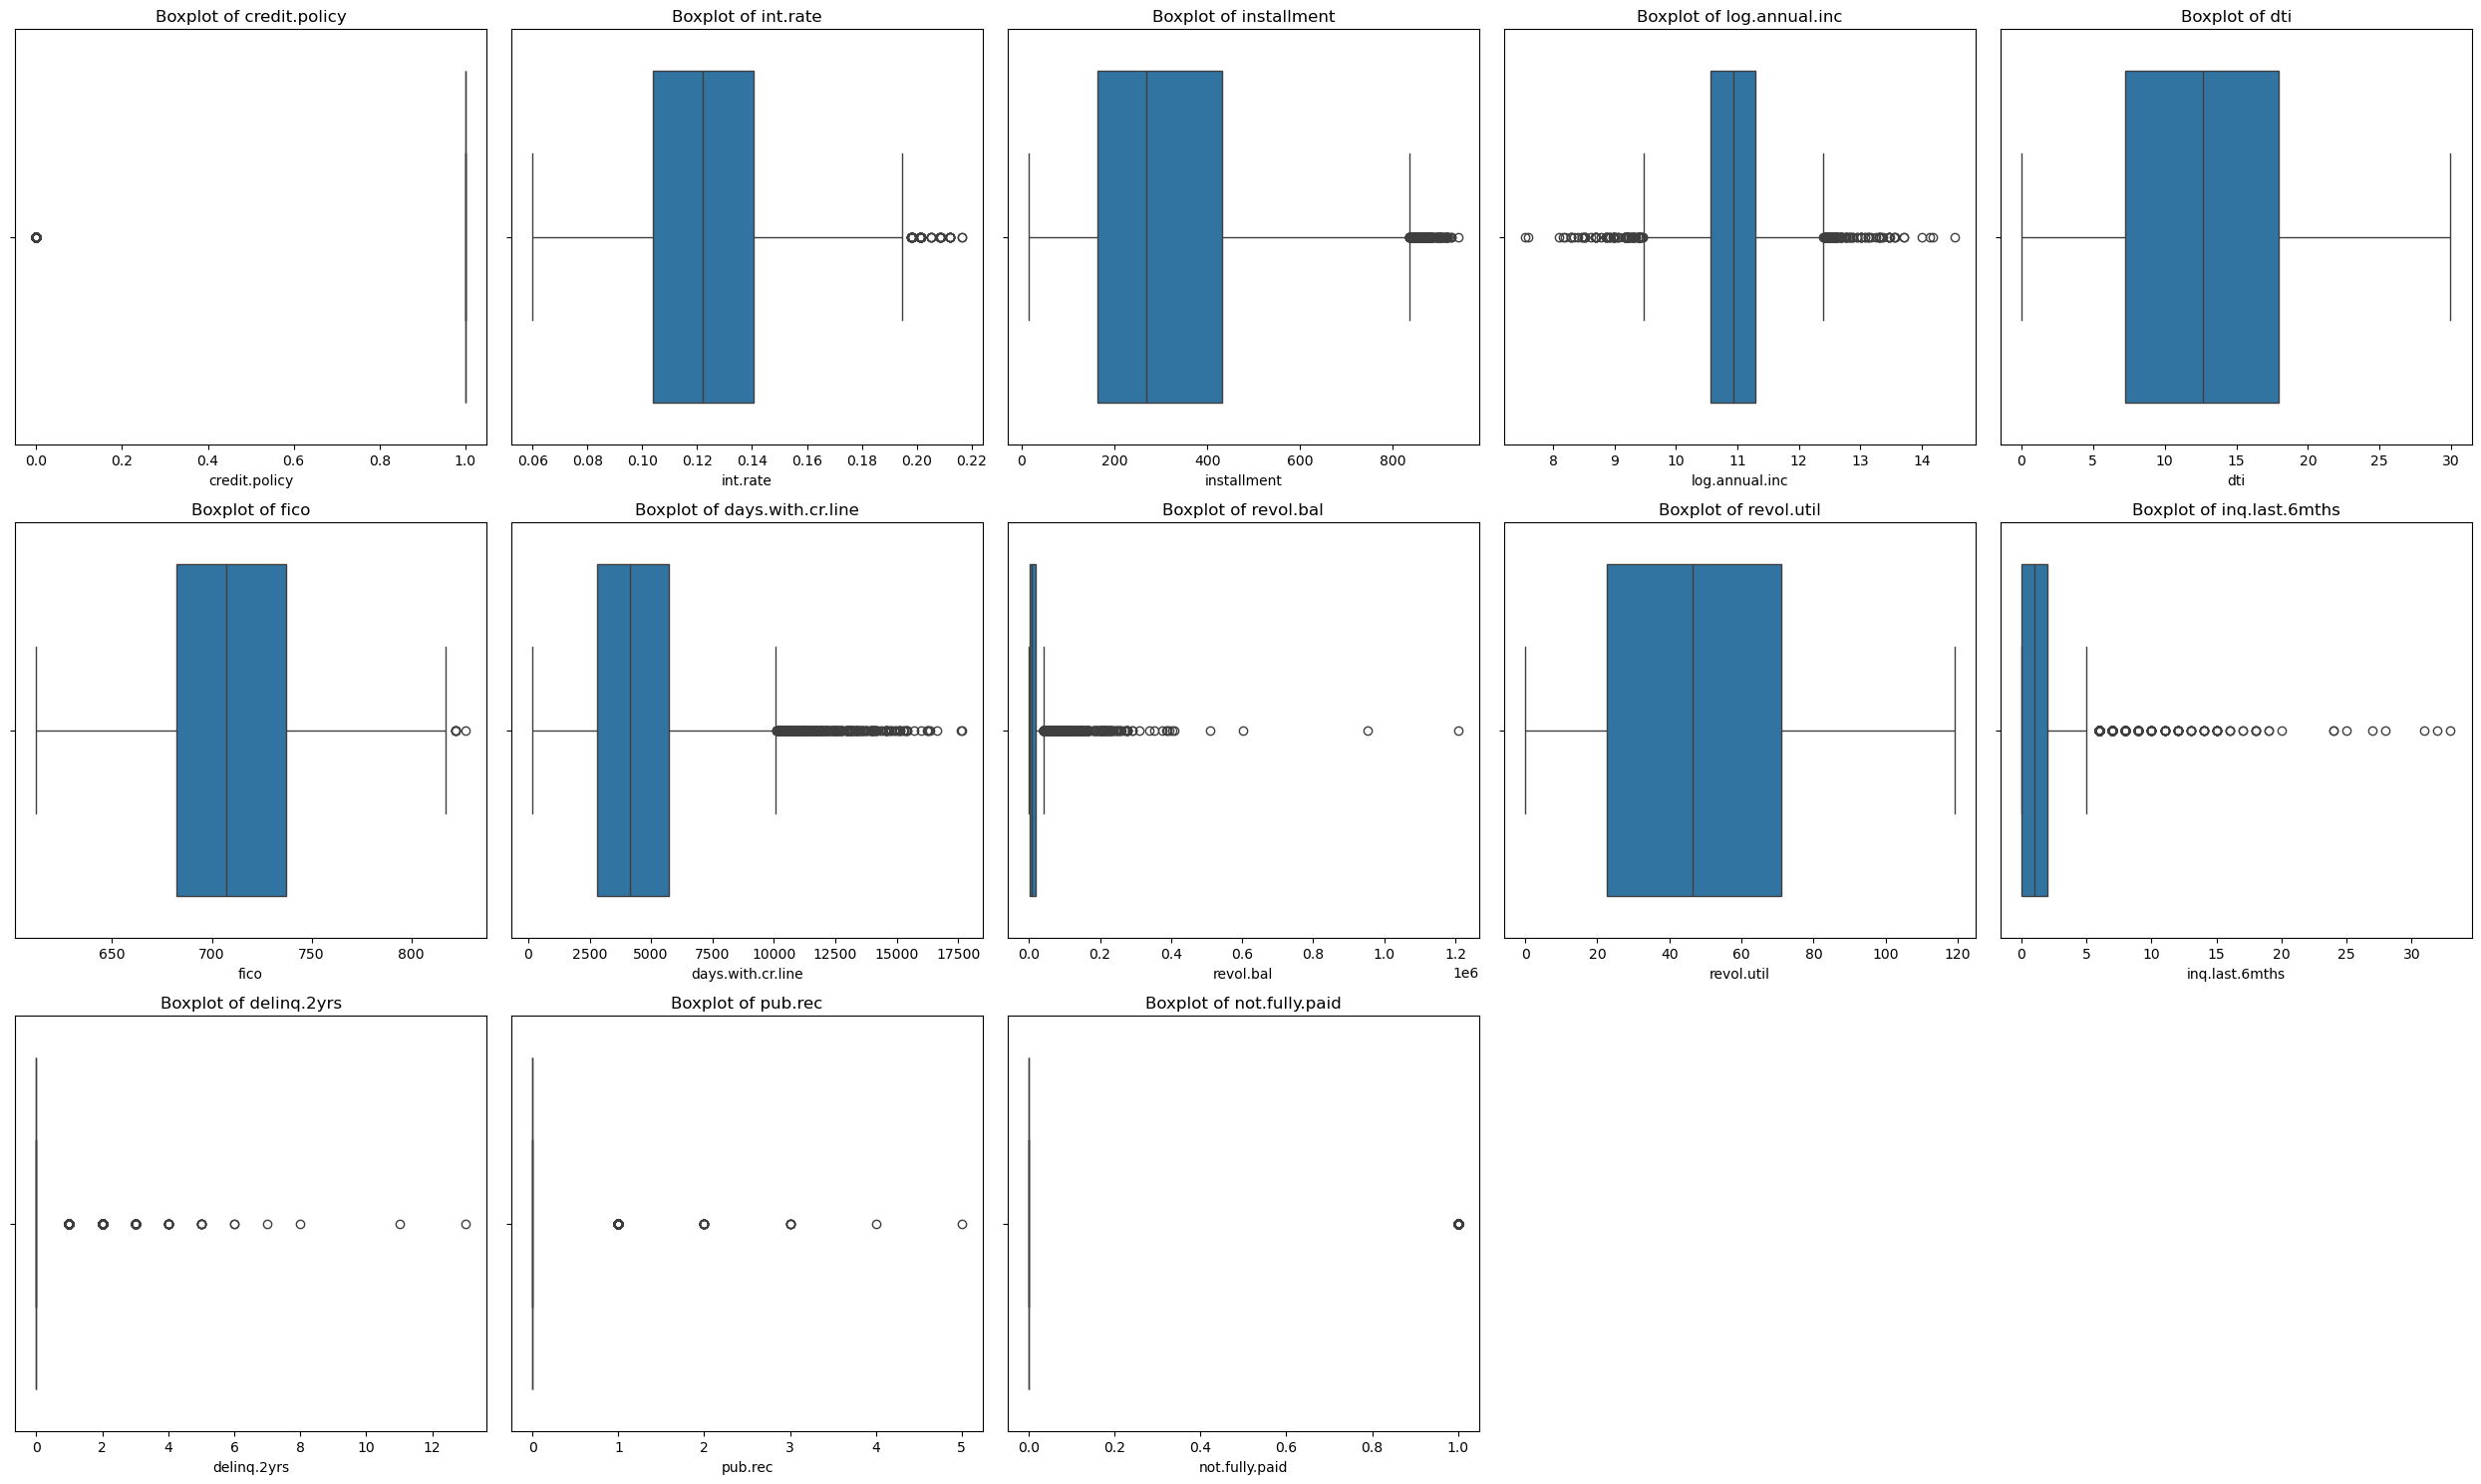

In [24]:
# Loop through each numerical column and plot the boxplot

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(3, 5, figsize=(25,15))
axes = axes.flatten()

# Loop through each numerical column and plot the boxplot in each subplot
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i]) 
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots if there are fewer numerical columns
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


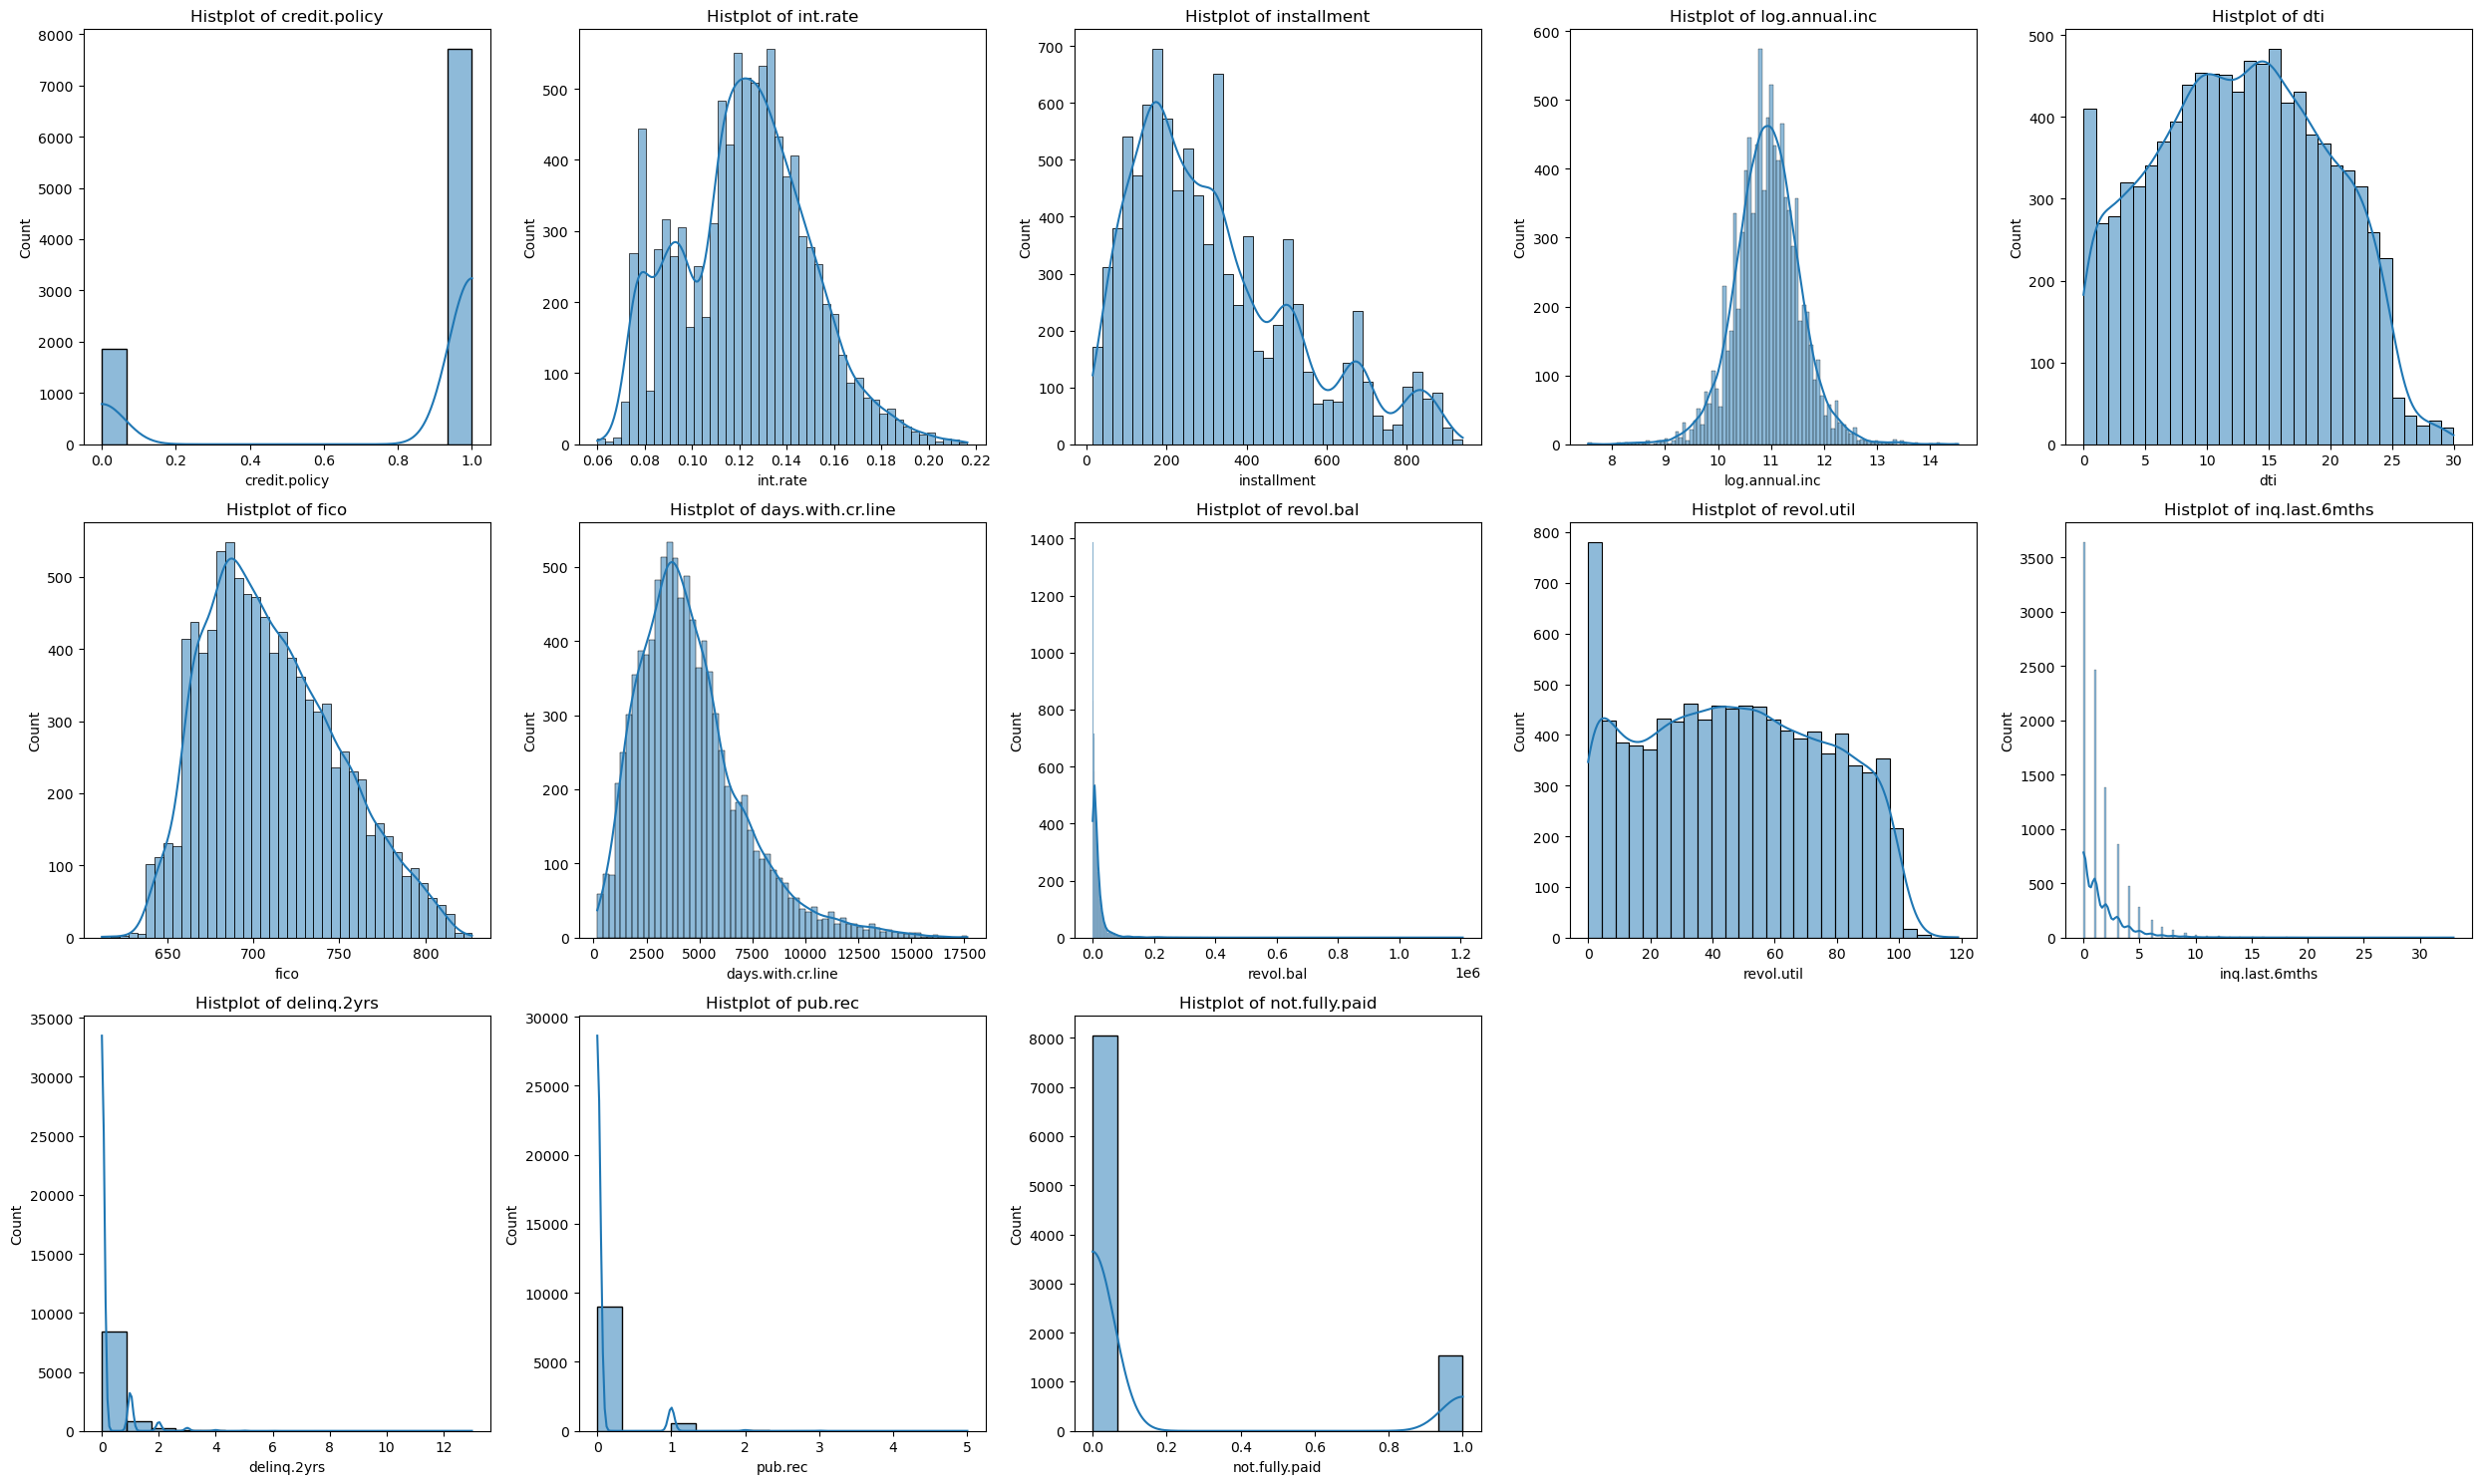

In [25]:
# Loop through each numerical column and plot the histogram

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(3, 5, figsize=(25,15))
axes = axes.flatten()

# Loop through each numerical column and plot the histplot in each subplot
for i, col in enumerate(num_cols):
    sns.histplot(x=df[col], ax=axes[i], kde=True) 
    axes[i].set_title(f'Histplot of {col}')

# Hide any unused subplots if there are fewer numerical columns
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Observation:** We found outliers in the features using for loan fraud detection, however those outliers could be important data for the analysis, or simple an extreme data, for example number of missed payement of applicant, number of credit history checked and number of public record. Hence, deleting outlier could cause dis balance in dataset and so would not give and efficient result.

**Solution:** Models like decision trees, random forests, etc. are more robust to outliers and may not require outlier removal, hence we use them.

### Bivariate Analysis

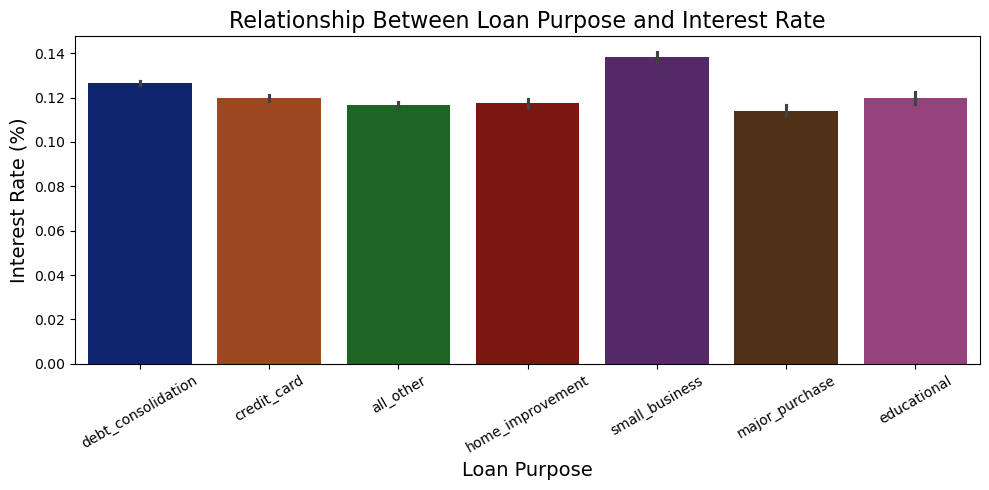

In [28]:
# Relationship between installment and interest rate

# Setting the figure size
plt.figure(figsize=(10, 5))

# Creating a box plot
sns.barplot(x='purpose', y='int.rate', data=df, hue="purpose",palette="dark",width=0.8)

# Adding title and labels
plt.title('Relationship Between Loan Purpose and Interest Rate', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=14)

# Show plot
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


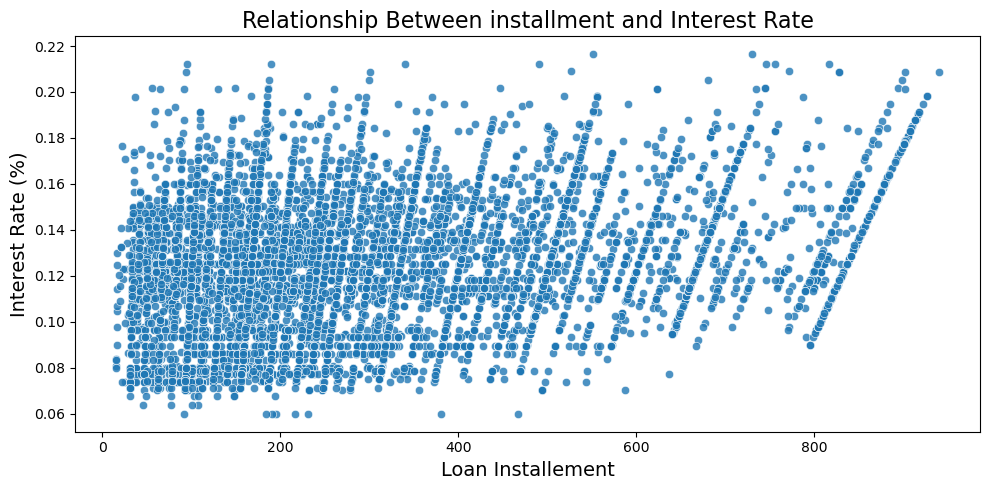

In [29]:
# Relationship between installment and interest rate

# Setting the figure size
plt.figure(figsize=(10, 5))

# Creating a box plot
sns.scatterplot(x='installment', y='int.rate', data=df, alpha=0.8)

# Adding title and labels
plt.title('Relationship Between installment and Interest Rate', fontsize=16)
plt.xlabel('Loan Installement', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


**Observation:** No such relationship between Interest rate and loan installment

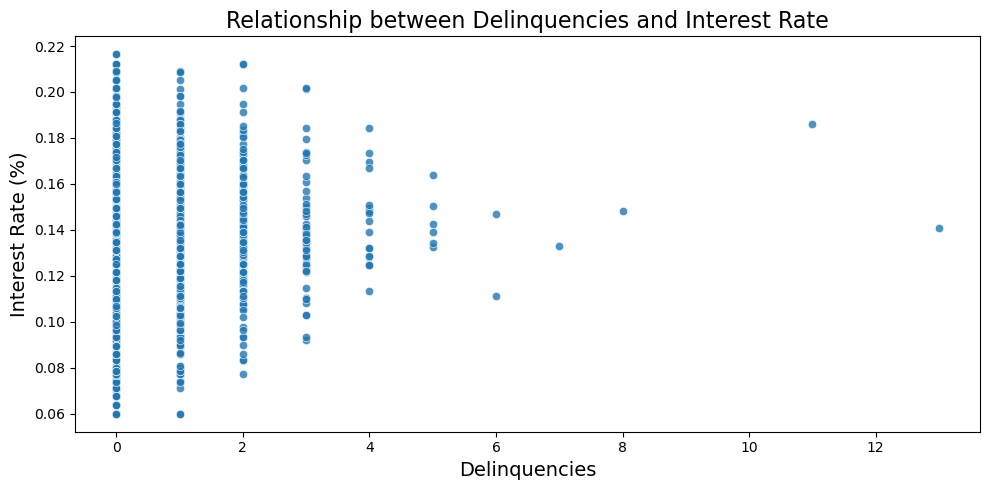

In [31]:
# Relationship between installment and interest rate

# Setting the figure size
plt.figure(figsize=(10, 5))

# Creating a box plot
sns.scatterplot(x='delinq.2yrs', y='int.rate', data=df, alpha=0.8)

# Adding title and labels
plt.title('Relationship between Delinquencies and Interest Rate', fontsize=16)
plt.xlabel('Delinquencies', fontsize=14)
plt.ylabel('Interest Rate (%)', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


**Observation:** Significant Number of Delinquencies for some higher interest rates 

### Multivariate Analysis

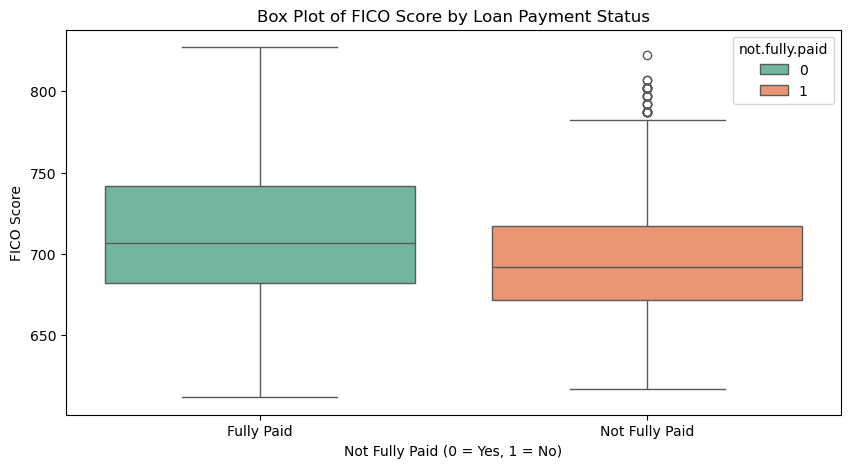

In [34]:
# Create a Box Plot for FICO
plt.figure(figsize=(10, 5))
sns.boxplot(x='not.fully.paid', y='fico', data=df, palette="Set2", hue='not.fully.paid')
plt.title('Box Plot of FICO Score by Loan Payment Status')
plt.xlabel('Not Fully Paid (0 = Yes, 1 = No)')
plt.ylabel('FICO Score')
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'])
plt.show()


**Observation:** Number of people fully paid the loan amount is greater than not payer.

## Exploratory Data Analysis

Create histogram of two FICO distributions on top of each other, one for each credit.policy outcome

Text(0.5, 0, 'FICO')

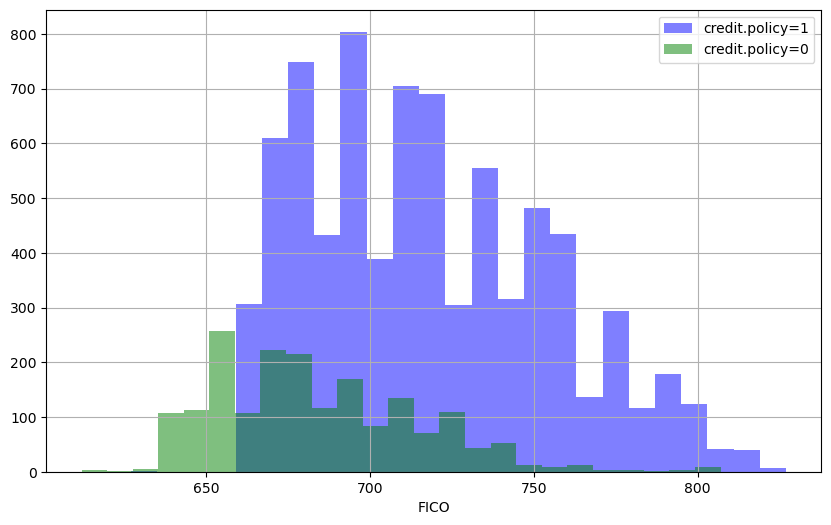

In [38]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=25,label='credit.policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='green',bins=25,label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')

Create histogram of two FICO distributions on top of each other, one for each not.fully.paid outcome

Text(0.5, 0, 'FICO')

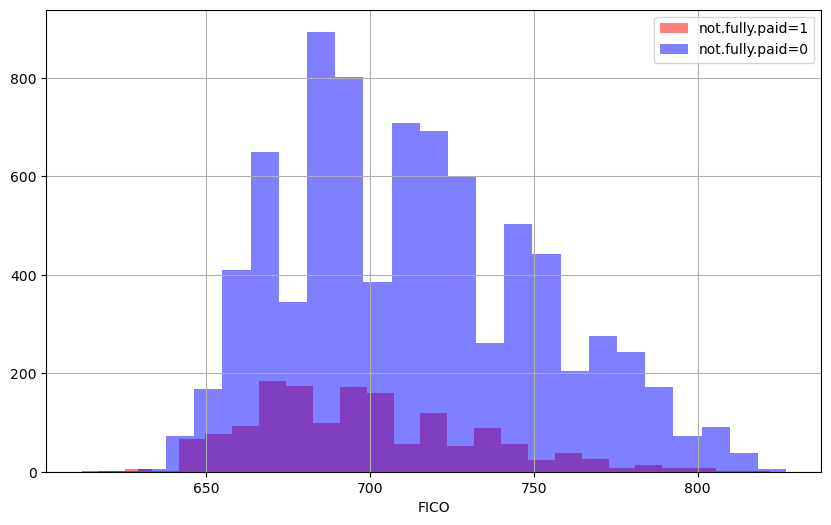

In [40]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',bins=25,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=25,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

In [41]:
df_copy=df.copy()

In [42]:
df_copy.rename(columns={'not.fully.paid':'not_fully_paid'},inplace=True)
df_copy

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


## Percentage Comparison

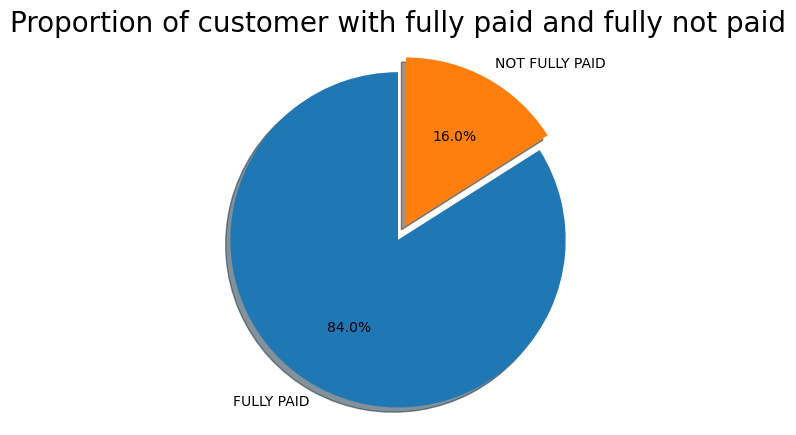

In [44]:
labels = 'FULLY PAID','NOT FULLY PAID'
sizes = [df_copy.not_fully_paid[df_copy['not_fully_paid']==0].count(), df_copy.not_fully_paid[df_copy['not_fully_paid']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer with fully paid and fully not paid", size = 20)
plt.show()

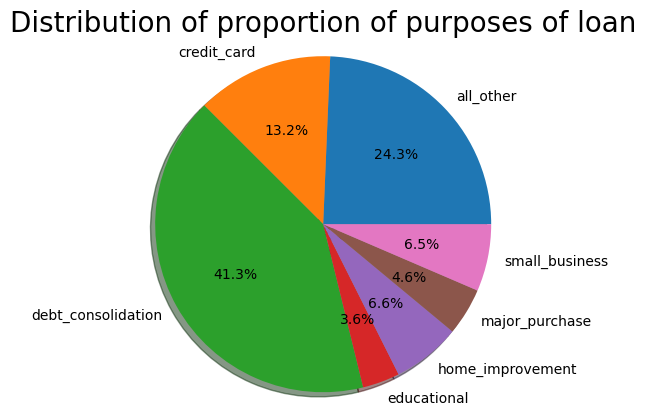

In [45]:
labels = df_copy['purpose'].astype('category').cat.categories.tolist()
counts = df_copy['purpose'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0, 0, 0,0,0)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title("Distribution of proportion of purposes of loan", size = 20)
plt.show()

<Axes: xlabel='purpose', ylabel='count'>

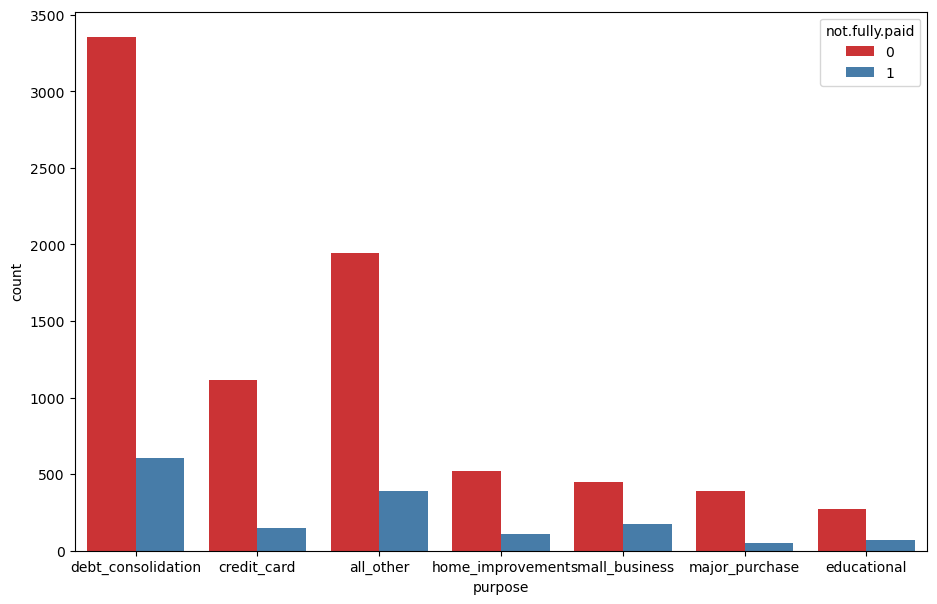

In [46]:
# Countplot using seaborn showing the counts of loans by purpose, with the hue defined by not.fully.paid.

plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

**Observation:** Highest number of loan taken by debt_consolidation, followed by all_others loan

In [48]:
# Convert categorical features into numeric features
cat_feats = ['purpose']
final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True)

# Convert bool columns to int
final_data = final_data.astype(int)

# Display the info of the final DataFrame
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   credit.policy               9578 non-null   int32
 1   int.rate                    9578 non-null   int32
 2   installment                 9578 non-null   int32
 3   log.annual.inc              9578 non-null   int32
 4   dti                         9578 non-null   int32
 5   fico                        9578 non-null   int32
 6   days.with.cr.line           9578 non-null   int32
 7   revol.bal                   9578 non-null   int32
 8   revol.util                  9578 non-null   int32
 9   inq.last.6mths              9578 non-null   int32
 10  delinq.2yrs                 9578 non-null   int32
 11  pub.rec                     9578 non-null   int32
 12  not.fully.paid              9578 non-null   int32
 13  purpose_credit_card         9578 non-null   int32
 14  purpose_

In [49]:
final_data.head(5).T

,0,1,2,3,4
credit.policy,1,1,1,1,1
int.rate,0,0,0,0,0
installment,829,228,366,162,102
log.annual.inc,11,11,10,11,11
dti,19,14,11,8,14
fico,737,707,682,712,667
days.with.cr.line,5639,2760,4710,2699,4066
revol.bal,28854,33623,3511,33667,4740
revol.util,52,76,25,73,39
inq.last.6mths,0,0,1,1,0


In [50]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.0,1.0,1.0,1.0,1.0
int.rate,9578.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
installment,9578.0,318.604302,207.082895,15.0,163.0,268.0,432.0,940.0
log.annual.inc,9578.0,10.445918,0.690671,7.0,10.0,10.0,11.0,14.0
dti,9578.0,12.118292,6.876929,0.0,7.0,12.0,17.0,29.0
fico,9578.0,710.846314,37.970537,612.0,682.0,707.0,737.0,827.0
days.with.cr.line,9578.0,4560.525162,2496.915263,178.0,2820.0,4139.0,5730.0,17639.0
revol.bal,9578.0,16913.963876,33756.189557,0.0,3187.0,8596.0,18249.5,1207359.0
revol.util,9578.0,46.363646,28.988864,0.0,22.0,46.0,70.0,119.0
inq.last.6mths,9578.0,1.577469,2.200245,0.0,0.0,1.0,2.0,33.0


## Train test split

In [52]:
X=final_data.drop('not.fully.paid',axis=1)
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,829,11,19,737,5639,28854,52,0,0,0,0,1,0,0,0,0
1,1,0,228,11,14,707,2760,33623,76,0,0,0,1,0,0,0,0,0
2,1,0,366,10,11,682,4710,3511,25,1,0,0,0,1,0,0,0,0
3,1,0,162,11,8,712,2699,33667,73,1,0,0,0,1,0,0,0,0
4,1,0,102,11,14,667,4066,4740,39,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,344,12,10,672,10474,215372,82,2,0,0,0,0,0,0,0,0
9574,0,0,257,11,0,722,4380,184,1,5,0,0,0,0,0,0,0,0
9575,0,0,97,10,13,687,3450,10036,82,8,0,0,0,1,0,0,0,0
9576,0,0,351,10,19,692,1800,0,3,5,0,0,0,0,0,1,0,0


In [53]:
y = final_data['not.fully.paid']
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int32

In [54]:
from sklearn.model_selection import train_test_split

X=final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

## Training Decision Tree Model
(Build a model using a Decision Tree algorithm, which splits data based on features to create rules for predictions. May give overfitting/underfitting result)

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Evaluating Decision Tree
Predictions from the test set, and create a classification report and a confusion matrix

In [58]:
predictions=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1623
           1       0.20      0.24      0.22       293

    accuracy                           0.74      1916
   macro avg       0.53      0.54      0.53      1916
weighted avg       0.76      0.74      0.75      1916



In [59]:
#Confusion Matrix:
print(confusion_matrix(y_test,predictions))

[[1347  276]
 [ 222   71]]


In [60]:
# a confusion matrix gives TN, TP, FP, FN value in the matrix in following format

'''The first row gives you:
True Negatives (TN) in the first column.
False Positives (FP) in the second column.
The second row gives you:

False Negatives (FN) in the first column.
True Positives (TP) in the second column.'''

# includes accuracy, precision, recall, F1 score

'The first row gives you:\nTrue Negatives (TN) in the first column.\nFalse Positives (FP) in the second column.\nThe second row gives you:\n\nFalse Negatives (FN) in the first column.\nTrue Positives (TP) in the second column.'

## Random Forest Model
(ensemble method that builds multiple decision trees and aggregates their predictions. they reduce overfitting by averaging predictions from many trees.)

In [62]:
#Training Random Forest Model:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

### Evaluating Random Forest Model

In [64]:
predictions=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1623
           1       0.20      0.24      0.22       293

    accuracy                           0.74      1916
   macro avg       0.53      0.54      0.53      1916
weighted avg       0.76      0.74      0.75      1916



In [65]:
print(confusion_matrix(y_test,predictions))

[[1347  276]
 [ 222   71]]


In [66]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8465553235908142


## Gradient Boosting
another ensemble technique that builds decision trees sequentially to correct errors made by previous trees.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
parameters = {
   "loss":["log_loss"],
    "learning_rate": [0.01, 0.05, 0.1],
    "min_samples_split": [0.1, 0.2, 0.3],
    "min_samples_leaf": [0.1, 0.2, 0.3],
    "max_depth":[3,5],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[10,50]
    }
gb_clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,verbose=1)

In [70]:
gb_clf.fit(X_train, y_train)
print(gb_clf.score(X_train, y_train))
print(gb_clf.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
0.838162359697207
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 10, 'subsample': 0.5}


In [72]:
parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.01],
    "min_samples_split": [0.1],
    "min_samples_leaf": [0.1],
    "max_depth":[3],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5],
    "n_estimators":[10]
    }
gb_clfb = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1,verbose=1)
gb_clfb.fit(X_train, y_train)
print(gb_clfb.score(X_train, y_train))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0.838162359697207


In [74]:
#Prediction
y_pred=gb_clfb.predict(X_test)

### Evaluating Gradient Boosting Model

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=1))  # Set 1 or 0 depending on how you want undefined metrics to behave


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       1.00      0.00      0.00       293

    accuracy                           0.85      1916
   macro avg       0.92      0.50      0.46      1916
weighted avg       0.87      0.85      0.78      1916



In [81]:
print(confusion_matrix(y_test,y_pred))

[[1623    0]
 [ 293    0]]


In [83]:
# For better visualisation:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
cm

Predicted,0,All
Actual,,
0,1623,1623
1,293,293
All,1916,1916


#### Outcomes:
##### (i) The actual number of people who have paid the loan is 1632.
##### (iii) The actual number of people who have not paid the loan is 293, but prediction predicts that they have paid the loan.
